# Project 1 : MTA




## Step1: import libaries :

In [1]:
import pandas as pd 
import datetime as d
import sqlalchemy as sql 
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math 
import random

### Step2: Load the DATA from HTML to DataFrame

In [2]:
#Step2: Load the DATA from HTML to DataFrame

# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210925, 210918, 210911, 210904, 210828, 210821,210814, 210807, 210731, 210724,210717, 210710]
turnstiles_df = get_data(week_nums)

# Step3: SQLite 

In [5]:
turnstiles_df.to_csv("/Users/nada./Desktop/data.csv",index=False)

In [6]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///MTA.db")

In [7]:
df = pd.read_sql('SELECT * FROM data;', engine)
df.head()

,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11
0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524


### Step4: Verifying Basic Data Integrity:

In [8]:
#turnstiles_df.head()
#turnstiles_df.tail()
#turnstiles_df.info()
#turnstiles_df.shape
# turnstiles_df.columns
#turnstiles_df.info()
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561


In [9]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
#Strip()
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
# Find Null Value & Drop:
turnstiles_df.ENTRIES.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
209683    False
209684    False
209685    False
209686    False
209687    False
Name: ENTRIES, Length: 2514588, dtype: bool

In [13]:
#Drop null values:
turnstiles_df2 = turnstiles_df.dropna()
turnstiles_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561


In [15]:
#Sort Values:

turnstiles_df2.DATE.value_counts().sort_index()

07/03/2021    30114
07/04/2021    29839
07/05/2021    29855
07/06/2021    30226
07/07/2021    29726
              ...  
09/20/2021    30444
09/21/2021    30082
09/22/2021    30014
09/23/2021    30033
09/24/2021    29899
Name: DATE, Length: 84, dtype: int64

# Step5:

In [16]:
#Turn this into a time series

import datetime 

#Take the date and time fields into a single datetime column
turnstiles_df2["DATE_TIME"] = pd.to_datetime(turnstiles_df2.DATE + " " + turnstiles_df2.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [17]:
turnstiles_df2.head() 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00


# Step6: Data Pre-processing


In [18]:
# Drop Duplicates :

(turnstiles_df2
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,ENTRIES
4678,R533,R055,00-00-03,FLUSHING-MAIN,599
4687,R533,R055,00-03-04,FLUSHING-MAIN,599
4680,R533,R055,00-00-05,FLUSHING-MAIN,599
4681,R533,R055,00-00-06,FLUSHING-MAIN,599
4682,R533,R055,00-00-07,FLUSHING-MAIN,599
4679,R533,R055,00-00-04,FLUSHING-MAIN,599
4676,R533,R055,00-00-01,FLUSHING-MAIN,599
4683,R533,R055,00-03-00,FLUSHING-MAIN,599
4684,R533,R055,00-03-01,FLUSHING-MAIN,599
4686,R533,R055,00-03-03,FLUSHING-MAIN,599


In [19]:
turnstiles_df2.shape

(2514588, 12)

In [20]:
mask = (turnstiles_df2.duplicated(subset =['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME'], keep ='first'))
turnstiles_df2[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
188399,R514,R094,00-00-00,ASTORIA BLVD,NQW,BMT,09/22/2021,12:00:00,RECOVR AUD,36569106,654311515,2021-09-22 12:00:00
188401,R514,R094,00-00-00,ASTORIA BLVD,NQW,BMT,09/22/2021,16:00:00,RECOVR AUD,36569106,654311515,2021-09-22 16:00:00
188403,R514,R094,00-00-00,ASTORIA BLVD,NQW,BMT,09/22/2021,20:00:00,RECOVR AUD,36569106,654311515,2021-09-22 20:00:00
188405,R514,R094,00-00-00,ASTORIA BLVD,NQW,BMT,09/23/2021,00:00:00,RECOVR AUD,36569106,654311515,2021-09-23 00:00:00
188409,R514,R094,00-00-00,ASTORIA BLVD,NQW,BMT,09/23/2021,08:00:00,RECOVR AUD,36569106,654311515,2021-09-23 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
190326,R523,R147,00-00-07,61 ST WOODSIDE,7,IRT,08/18/2021,05:00:00,RECOVR AUD,22112575,4491111,2021-08-18 05:00:00
188380,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,RECOVR AUD,262243,0,2021-07-22 00:00:00
188382,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,RECOVR AUD,262243,0,2021-07-22 04:00:00
188386,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,RECOVR AUD,262243,0,2021-07-22 08:00:00


In [22]:
turnstiles_df3= turnstiles_df2[turnstiles_df2['DESC']=='REGULAR']

In [23]:
turnstiles_df3.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [25]:
turnstiles_df3.sample(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
141362,R147,R033,04-05-00,TIMES SQ-42 ST,1237ACENQRS,IRT,07/25/2021,16:00:00,REGULAR,17841111,1330323563,2021-07-25 16:00:00
148089,R175,R169,01-00-00,137 ST CITY COL,1,IRT,08/26/2021,13:00:00,REGULAR,220029,1567959,2021-08-26 13:00:00
142196,R154,R116,00-03-02,50 ST,1,IRT,08/08/2021,04:00:00,REGULAR,12892,18825,2021-08-08 04:00:00


In [27]:
(turnstiles_df3
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,ENTRIES
4682,R533,R055,00-03-00,FLUSHING-MAIN,570
4681,R533,R055,00-00-07,FLUSHING-MAIN,570
4679,R533,R055,00-00-05,FLUSHING-MAIN,570
4678,R533,R055,00-00-04,FLUSHING-MAIN,570
4677,R533,R055,00-00-03,FLUSHING-MAIN,570


In [28]:
turnstiles_df3.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00


In [29]:
#Create New DataFrame : 
turnstiles_df_Daily=(turnstiles_df3.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","DATE_TIME","EXITS"],as_index=False)
                        .ENTRIES.first()
               )

In [30]:
turnstiles_df_Daily.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES
0,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 00:00:00,2597187,7596401
1,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 04:00:00,2597189,7596412
2,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 08:00:00,2597208,7596422
3,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 12:00:00,2597262,7596466
4,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 16:00:00,2597289,7596572


In [31]:
# Create new Column Name is TIME_INTERVAL:

turnstiles_df_Daily["TIME_INTERVAL"] = (
    np.where( (turnstiles_df_Daily.DATE_TIME.dt.hour <= 4), "0:00 to 4:00"
         ,np.where(
             (turnstiles_df_Daily.DATE_TIME.dt.hour <= 8), "4:00 to 8:00"
             ,np.where(
                 (turnstiles_df_Daily.DATE_TIME.dt.hour <= 12), "8:00 to 12:00"
                 ,np.where(
                     (turnstiles_df_Daily.DATE_TIME.dt.hour <= 16), "12:00 to 16:00"
                     ,np.where(
                         (turnstiles_df_Daily.DATE_TIME.dt.hour <= 20), "16:00 to 20:00"
                         ,"20:00 to 24:00"))))))

In [32]:
#Create new Column :

turnstiles_df_Daily[["P_DATE","P_ENTRIES","P_EXITS"]] = (turnstiles_df_Daily.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])["DATE","ENTRIES","EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

/Users/nada./opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
turnstiles_df_Daily.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS
0,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 00:00:00,2597187,7596401,0:00 to 4:00,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 04:00:00,2597189,7596412,0:00 to 4:00,07/03/2021,7596401.0,2597187.0
2,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 08:00:00,2597208,7596422,4:00 to 8:00,NaN,NaN,NaN
3,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 12:00:00,2597262,7596466,8:00 to 12:00,NaN,NaN,NaN
4,A002,R051,02-00-00,59 ST,07/03/2021,2021-07-03 16:00:00,2597289,7596572,12:00 to 16:00,NaN,NaN,NaN


In [34]:
turnstiles_df_Daily.shape

(2501799, 12)

In [35]:
turnstiles_df_Daily.dropna(subset=["P_DATE"], axis=0, inplace=True)

In [36]:
(turnstiles_df_Daily[turnstiles_df_Daily["ENTRIES"] < turnstiles_df_Daily["P_ENTRIES"]]
.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])
.size())

C/A   UNIT  SCP       STATION     TIME_INTERVAL 
A011  R080  01-03-00  57 ST-7 AV  0:00 to 4:00      167
                                  12:00 to 16:00     82
                                  16:00 to 20:00     82
                                  4:00 to 8:00       83
                                  8:00 to 12:00      83
                                                   ... 
S101  R070  00-00-02  ST. GEORGE  0:00 to 4:00        4
                                  12:00 to 16:00      3
                                  16:00 to 20:00      3
                                  4:00 to 8:00        4
                                  8:00 to 12:00       3
Length: 1056, dtype: int64

In [37]:
(turnstiles_df_Daily[turnstiles_df_Daily["EXITS"] < turnstiles_df_Daily["P_EXITS"]]
.groupby(["C/A", "UNIT", "SCP", "STATION","TIME_INTERVAL"])
.size())

C/A   UNIT  SCP       STATION     TIME_INTERVAL 
A011  R080  01-03-00  57 ST-7 AV  0:00 to 4:00      167
                                  12:00 to 16:00     82
                                  16:00 to 20:00     82
                                  4:00 to 8:00       83
                                  8:00 to 12:00      83
                                                   ... 
S101  R070  00-00-02  ST. GEORGE  0:00 to 4:00        4
                                  12:00 to 16:00      3
                                  16:00 to 20:00      3
                                  4:00 to 8:00        4
                                  8:00 to 12:00       3
Length: 955, dtype: int64

In [38]:
turnstiles_df_Daily[turnstiles_df_Daily["ENTRIES"] < turnstiles_df_Daily["P_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS
19511,A011,R080,01-03-00,57 ST-7 AV,07/03/2021,2021-07-03 04:00:00,489548380,885593449,0:00 to 4:00,07/03/2021,885593469.0,489548405.0
19516,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,2021-07-04 00:00:00,489547650,885593256,0:00 to 4:00,07/03/2021,885593449.0,489548380.0
19517,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,2021-07-04 04:00:00,489547622,885593241,0:00 to 4:00,07/04/2021,885593256.0,489547650.0
19518,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,2021-07-04 08:00:00,489547590,885593233,4:00 to 8:00,07/03/2021,885593444.0,489548326.0
19519,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,2021-07-04 12:00:00,489547480,885593214,8:00 to 12:00,07/03/2021,885593420.0,489548169.0


In [39]:
turnstiles_df_Daily[turnstiles_df_Daily["EXITS"] < turnstiles_df_Daily["P_EXITS"]].head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS
19511,A011,R080,01-03-00,57 ST-7 AV,07/03/2021,2021-07-03 04:00:00,489548380,885593449,0:00 to 4:00,07/03/2021,885593469.0,489548405.0
19516,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,2021-07-04 00:00:00,489547650,885593256,0:00 to 4:00,07/03/2021,885593449.0,489548380.0
19517,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,2021-07-04 04:00:00,489547622,885593241,0:00 to 4:00,07/04/2021,885593256.0,489547650.0
19518,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,2021-07-04 08:00:00,489547590,885593233,4:00 to 8:00,07/03/2021,885593444.0,489548326.0
19519,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,2021-07-04 12:00:00,489547480,885593214,8:00 to 12:00,07/03/2021,885593420.0,489548169.0


In [ ]:
# Find The Outlier and Remove it :

In [40]:
def get_daily_counts(row, max_counter):
    counter = abs(row["ENTRIES"] - row["P_ENTRIES"])
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["P_ENTRIES"])
        counter = min(row["ENTRIES"], row["P_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_df_Daily["DAILY_ENTRIES"] = turnstiles_df_Daily.apply(get_daily_counts, axis=1, max_counter=1000000)


193 8049438.0
353 8049600.0
393 8049630.0
396 8048706.0
545 8049072.0
764 8049271.0
167790067 702228.0
167790102 702247.0
167790157 702266.0
167790175 702272.0
167790192 702221.0
151 5601415.0
310 5601538.0
370 5601589.0
720 5601956.0
982 5602299.0
98 9761685.0
443 9762012.0
763 9762328.0
1277 9761479.0
1736 9761621.0
33565227 188178.0
33565264 188178.0
33565264 188178.0
33565264 188182.0
33565264 188198.0
33565264 188201.0
12 8723968.0
1155 8723874.0
1206 8723932.0
1207 8723963.0
1378 8724126.0
1462 8723776.0
66 3272795.0
127 3272111.0
247 3272329.0
418 3272536.0
511 3272713.0
5671 4298422.0
5946 4298704.0
6006 4298771.0
6042 4298784.0
6160 4298891.0
0 117440512.0
0 117440512.0
0 117440512.0
0 117440512.0
0 117440512.0
15848006 2216515.0
2216520 15848006.0
10487784 2022.0
2024 10487784.0
327820 7576712.0
327975 7577027.0
328039 7577106.0
328050 7577112.0
328094 7576484.0
67109632 14.0
67109632 14.0
67109632 14.0
67109632 14.0
67109635 14.0
327682 67109640.0
327682 67109640.0
327682 67

In [41]:
def get_daily_counts(row, max_counter):
    counter =abs(row["EXITS"] - row["P_EXITS"])
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["P_EXITS"])
        counter = min(row["EXITS"], row["P_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_df_Daily["DAILY_EXITS"] = turnstiles_df_Daily.apply(get_daily_counts, axis=1, max_counter=1000000)

63 2357269.0
165 2357375.0
195 2357391.0
201 2357127.0
208 2357146.0
240 2357186.0
268473354 1082703.0
268473528 1082770.0
268473848 1083083.0
268474006 1083236.0
268474076 1082614.0
187 2239105.0
633 2239324.0
813 2239491.0
914 2239554.0
1045 2239687.0
12 1076133.0
17 1076138.0
26 1076153.0
61 1076097.0
91 1076117.0
100678103 411664.0
100678311 411864.0
100678311 411916.0
100678311 412261.0
100678311 412511.0
100678311 413088.0
7 8512736.0
1361 8512494.0
1517 8512663.0
1591 8512725.0
1698 8512839.0
1778 8512390.0
7 1025567.0
125 1025155.0
330 1025275.0
602 1025424.0
708 1025488.0
715 1025493.0
146 2544401.0
255 2543525.0
356 2543710.0
513 2543879.0
713 2544156.0
306 1150397.0
597 1150648.0
646 1150695.0
1235 1151342.0
1971 1149014.0
2647 1149606.0
14484466 852972.0
853000 14484466.0
15894763 166120.0
166125 15894763.0
2133796536 55608.0
55645 2133796536.0
62 2004621.0
106 2004675.0
128 2004694.0
140 2004698.0
160 2004551.0
7 1502299.0
38 1502329.0
79 1502382.0
106 1502413.0
121 150242

In [42]:
turnstiles_df_Daily.sort_values("DAILY_ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS,DAILY_ENTRIES,DAILY_EXITS
1628331,R123,R290,00-00-02,HOUSTON ST,08/05/2021,2021-08-05 21:00:00,71,240,20:00 to 24:00,08/04/2021,993695.0,287043.0,993455.0,286972.0
1628334,R123,R290,00-00-02,HOUSTON ST,08/06/2021,2021-08-06 09:00:00,169,408,8:00 to 12:00,08/05/2021,993855.0,287172.0,993447.0,287003.0
1628332,R123,R290,00-00-02,HOUSTON ST,08/06/2021,2021-08-06 01:00:00,87,354,0:00 to 4:00,08/05/2021,993801.0,287060.0,993447.0,286973.0
1628335,R123,R290,00-00-02,HOUSTON ST,08/06/2021,2021-08-06 13:00:00,227,516,12:00 to 16:00,08/05/2021,993961.0,287226.0,993445.0,286999.0
1628333,R123,R290,00-00-02,HOUSTON ST,08/06/2021,2021-08-06 05:00:00,90,364,4:00 to 8:00,08/05/2021,993804.0,287066.0,993440.0,286976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200570,R421,R427,00-06-01,MIDDLETOWN RD,09/05/2021,2021-09-05 17:00:00,29,262144,16:00 to 20:00,09/04/2021,262144.0,29.0,0.0,0.0
2200569,R421,R427,00-06-01,MIDDLETOWN RD,09/05/2021,2021-09-05 13:00:00,29,262144,12:00 to 16:00,09/04/2021,262144.0,29.0,0.0,0.0
2200568,R421,R427,00-06-01,MIDDLETOWN RD,09/05/2021,2021-09-05 09:00:00,29,262144,8:00 to 12:00,09/04/2021,262144.0,29.0,0.0,0.0
2200567,R421,R427,00-06-01,MIDDLETOWN RD,09/05/2021,2021-09-05 05:00:00,29,262144,4:00 to 8:00,09/04/2021,262144.0,29.0,0.0,0.0


### step7: The Aggregation 

In [43]:
turnstiles_df_Daily['STATION'].value_counts()

34 ST-PENN STA     50295
FULTON ST          47728
GRD CNTRL-42 ST    45361
23 ST              36190
86 ST              32241
                   ...  
PRESIDENT ST        1472
MORRIS PARK         1465
AVENUE X            1458
CLEVELAND ST         994
SUTTER AV            990
Name: STATION, Length: 379, dtype: int64

In [44]:
turnstiles_df_Daily_ENTRIES= \
(turnstiles_df_Daily.groupby(["STATION", "TIME_INTERVAL"])[['DAILY_ENTRIES']].sum().reset_index())
turnstiles_df_Daily_ENTRIES.head()

,STATION,TIME_INTERVAL,DAILY_ENTRIES
0,1 AV,0:00 to 4:00,627925.0
1,1 AV,12:00 to 16:00,630655.0
2,1 AV,16:00 to 20:00,632613.0
3,1 AV,4:00 to 8:00,628041.0
4,1 AV,8:00 to 12:00,628981.0


In [45]:
turnstiles_df_Daily_EXITS = \
(turnstiles_df_Daily.groupby(["STATION", "TIME_INTERVAL"])[['DAILY_EXITS']].sum()
                 .reset_index())
turnstiles_df_Daily_EXITS.head()


,STATION,TIME_INTERVAL,DAILY_EXITS
0,1 AV,0:00 to 4:00,1153341.0
1,1 AV,12:00 to 16:00,1157658.0
2,1 AV,16:00 to 20:00,1159477.0
3,1 AV,4:00 to 8:00,1154200.0
4,1 AV,8:00 to 12:00,1157167.0


In [ ]:
#Create a new column name is daily traffic is combine a daily entries and exits

In [47]:
turnstiles_df_Daily['DAILY_TRAFFIC'] = (turnstiles_df_Daily['DAILY_ENTRIES'] + turnstiles_df_Daily['DAILY_EXITS'])

In [48]:
turnstiles_df_Daily.sort_values("DAILY_TRAFFIC", ascending=False)

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,EXITS,ENTRIES,TIME_INTERVAL,P_DATE,P_ENTRIES,P_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
2295142,R528,R097,00-00-01,JUNCTION BLVD,09/17/2021,2021-09-17 08:00:00,813102,774522,4:00 to 8:00,09/15/2021,9475375.0,8118107.0,774522.0,813102.0,1587624.0
2295145,R528,R097,00-00-01,JUNCTION BLVD,09/18/2021,2021-09-18 08:00:00,8123356,9481069,4:00 to 8:00,09/17/2021,774522.0,813102.0,774522.0,813102.0,1587624.0
2295143,R528,R097,00-00-01,JUNCTION BLVD,09/18/2021,2021-09-18 00:00:00,8123185,9480674,0:00 to 4:00,09/17/2021,774465.0,813023.0,774465.0,813023.0,1587488.0
2295140,R528,R097,00-00-01,JUNCTION BLVD,09/17/2021,2021-09-17 00:00:00,813021,774463,0:00 to 4:00,09/15/2021,9474807.0,8118040.0,774463.0,813021.0,1587484.0
2295148,R528,R097,00-00-01,JUNCTION BLVD,09/18/2021,2021-09-18 20:00:00,8124158,9482240,16:00 to 20:00,09/16/2021,774447.0,812992.0,774447.0,812992.0,1587439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280867,N536,R270,00-05-00,SMITH-9 ST,08/03/2021,2021-08-03 00:00:00,0,629,0:00 to 4:00,08/02/2021,629.0,0.0,0.0,0.0,0.0
1280868,N536,R270,00-05-00,SMITH-9 ST,08/03/2021,2021-08-03 04:00:00,0,629,0:00 to 4:00,08/03/2021,629.0,0.0,0.0,0.0,0.0
1280869,N536,R270,00-05-00,SMITH-9 ST,08/03/2021,2021-08-03 08:00:00,0,629,4:00 to 8:00,08/02/2021,629.0,0.0,0.0,0.0,0.0
1280870,N536,R270,00-05-00,SMITH-9 ST,08/03/2021,2021-08-03 12:00:00,0,629,8:00 to 12:00,08/02/2021,629.0,0.0,0.0,0.0,0.0


In [49]:
turnstiles_df_Daily_TRAFFIC = \
(turnstiles_df_Daily.groupby(["STATION", "TIME_INTERVAL","DATE"])[['DAILY_TRAFFIC']].sum()
                 .reset_index())
turnstiles_df_Daily_EXITS.head()

,STATION,TIME_INTERVAL,DAILY_EXITS
0,1 AV,0:00 to 4:00,1153341.0
1,1 AV,12:00 to 16:00,1157658.0
2,1 AV,16:00 to 20:00,1159477.0
3,1 AV,4:00 to 8:00,1154200.0
4,1 AV,8:00 to 12:00,1157167.0


In [70]:
turnstiles_df_Daily_TRAFFIC2= (turnstiles_df_Daily_TRAFFIC.groupby(["STATION", "TIME_INTERVAL","DATE"])[['DAILY_TRAFFIC']].max()
                .sort_values('DAILY_TRAFFIC', ascending=False)
                 .reset_index())
turnstiles_df_Daily_TRAFFIC2.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
0,JUNCTION BLVD,16:00 to 20:00,09/18/2021,5120294.0
1,JUNCTION BLVD,0:00 to 4:00,09/18/2021,5113274.0
2,JUNCTION BLVD,4:00 to 8:00,09/18/2021,5111745.0
3,JUNCTION BLVD,4:00 to 8:00,09/17/2021,5077758.0
4,JUNCTION BLVD,0:00 to 4:00,09/17/2021,5075982.0


In [ ]:
# Find the top 5 station :

In [51]:
top5_stations = (turnstiles_df_Daily.groupby(['STATION'])['DAILY_TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_TRAFFIC',ascending=False) 
                   .STATION.head())

In [52]:
top5_stations.head()

61     34 ST-PENN STA
259     JUNCTION BLVD
226         FULTON ST
315      PATH NEW WTC
14     14 ST-UNION SQ
Name: STATION, dtype: object

In [ ]:
# Find a total station 

In [53]:
station_totals = turnstiles_df_Daily.groupby('STATION').sum()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,EXITS,ENTRIES,P_ENTRIES,P_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,34 ST-PENN STA,2566096976592,2315023657003,2.315616e+12,2.566092e+12,23039656.0,32222146.0,55261802.0
1,JUNCTION BLVD,37491521059,31188649641,3.119228e+10,3.748838e+10,18472612.0,24227402.0,42700014.0
2,FULTON ST,1974569808084,1594694101777,1.594691e+12,1.974558e+12,21154731.0,19931201.0,41085932.0
3,PATH NEW WTC,1698713059,2004570670,2.005946e+09,1.701976e+09,19349034.0,20960274.0,40309308.0
4,14 ST-UNION SQ,97526233408,135552792700,1.355506e+11,9.751091e+10,13959816.0,25615851.0,39575667.0


### Step 8: Data Visualization  

Text(0.5, 1.0, 'Top 10 busiest stations')

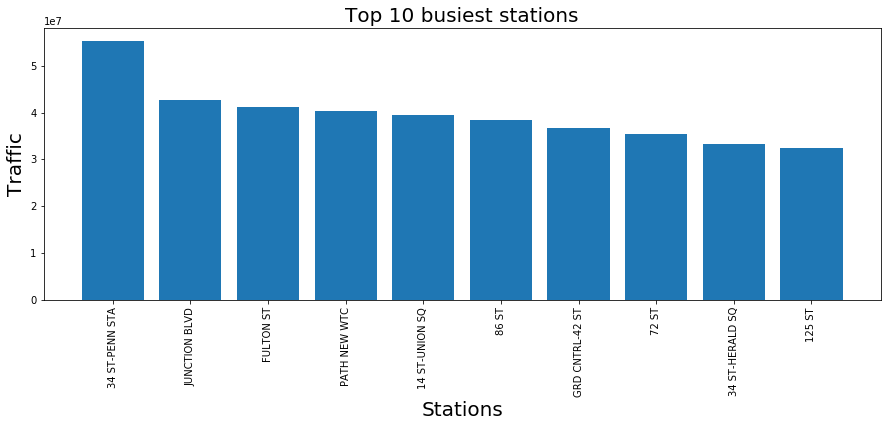

In [54]:
#Top 10 stations 
plt.figure(figsize=(15,5))
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_TRAFFIC'][:10])
plt.ylabel("Traffic",size=20)
plt.xlabel("Stations", size=20)
plt.xticks(rotation=90)
plt.title('Top 10 busiest stations',size=20)

Text(0.5, 1.0, 'Top 5 busiest stations')

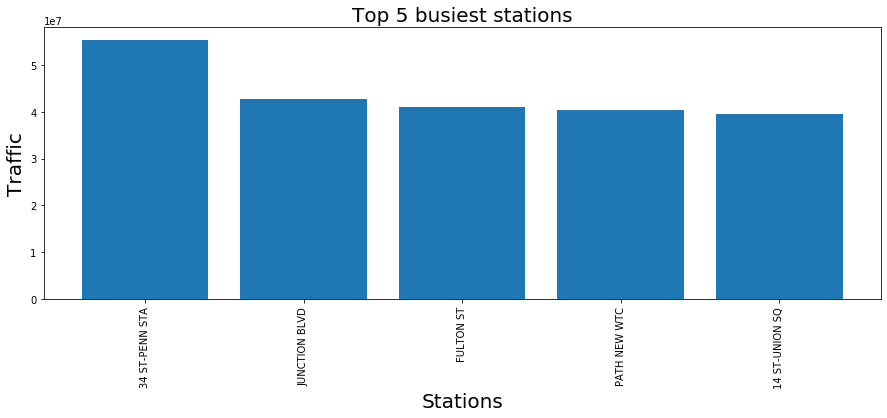

In [62]:
#top 5 stations 

plt.figure(figsize=(15,5))
plt.bar(x=station_totals['STATION'][:5], height=station_totals['DAILY_TRAFFIC'][:5])
plt.ylabel("Traffic",size=20)
plt.xlabel("Stations", size=20)
plt.xticks(rotation=90)
plt.title('Top 5 busiest stations',size=20)

In [64]:
Days_in_week = turnstiles_df_Daily_TRAFFIC2[(turnstiles_df_Daily_TRAFFIC2["DATE"] == "09/18/2021") & 
(turnstiles_df_Daily_TRAFFIC2["STATION"] == "JUNCTION BLVD")]

Days_in_week.head()


,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
0,JUNCTION BLVD,16:00 to 20:00,09/18/2021,5120294.0
1,JUNCTION BLVD,0:00 to 4:00,09/18/2021,5113274.0
2,JUNCTION BLVD,4:00 to 8:00,09/18/2021,5111745.0
796,JUNCTION BLVD,8:00 to 12:00,09/18/2021,111378.0
815,JUNCTION BLVD,12:00 to 16:00,09/18/2021,110483.0


In [65]:
# specefic date for one of the top station :

Days_one = turnstiles_df_Daily_TRAFFIC2[(turnstiles_df_Daily_TRAFFIC2["DATE"] == "09/18/2021") & 
(turnstiles_df_Daily_TRAFFIC2["STATION"] == "JUNCTION BLVD")]

Days_one.head()


,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
0,JUNCTION BLVD,16:00 to 20:00,09/18/2021,5120294.0
1,JUNCTION BLVD,0:00 to 4:00,09/18/2021,5113274.0
2,JUNCTION BLVD,4:00 to 8:00,09/18/2021,5111745.0
796,JUNCTION BLVD,8:00 to 12:00,09/18/2021,111378.0
815,JUNCTION BLVD,12:00 to 16:00,09/18/2021,110483.0


Text(0.5, 1.0, 'The Daily Traffic on 09/18/2021 of "JUNCTION BLVD" Station ')

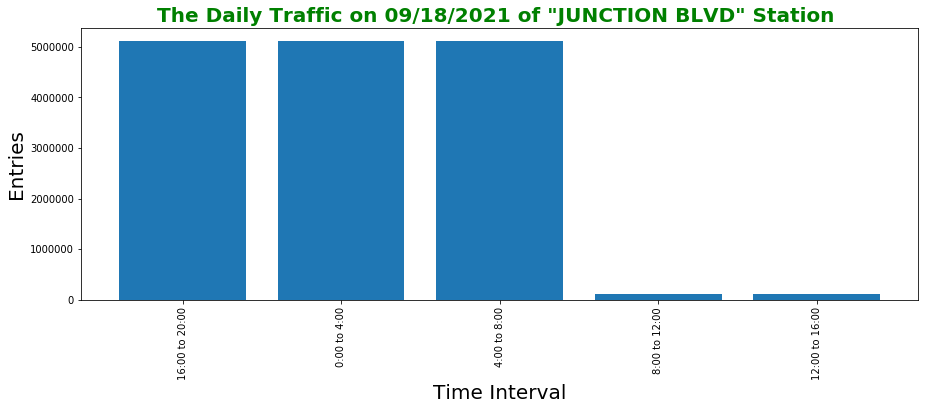

In [68]:
# specefic date for one of the top station :
plt.figure(figsize=(15,5))
plt.bar(x=Days_one['TIME_INTERVAL'],height=Days_one['DAILY_TRAFFIC'])
plt.ylabel("Entries",size=20)
plt.xlabel("Time Interval", size=20)
plt.xticks(rotation=90 )
plt.title('The Daily Traffic on 09/18/2021 of "JUNCTION BLVD" Station ', color='g', size=20, weight="bold")


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Daily_in_sunday['TIME_INTERVAL'],Daily_in_sunday['DAILY_TRAFFIC'],color='y')
plt.ylabel("Entries",size=20, weight="bold")
plt.xlabel("Time Interval", size=20, weight="bold")
plt.xticks(rotation=90 )
plt.title('The Daily Traffic in Sunday of (34 ST-PENN STA) Station ', color='r',size=20, weight="bold")


In [73]:
Days_two = turnstiles_df_Daily_TRAFFIC2[(turnstiles_df_Daily_TRAFFIC2["DATE"] == "09/20/2021") & 
(turnstiles_df_Daily_TRAFFIC2["STATION"] == "JUNCTION BLVD")]

Days_two.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
21118,JUNCTION BLVD,8:00 to 12:00,09/20/2021,20659.0
21526,JUNCTION BLVD,12:00 to 16:00,09/20/2021,20330.0
22440,JUNCTION BLVD,4:00 to 8:00,09/20/2021,19688.0
26405,JUNCTION BLVD,16:00 to 20:00,09/20/2021,17291.0


Text(0.5, 1.0, 'The Daily Traffic on 09/20/2021 Sunday of "JUNCTION BLVD" Station ')

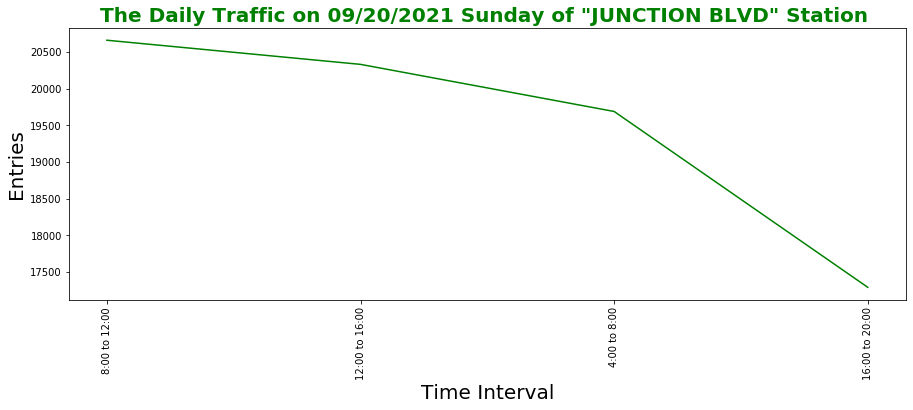

In [74]:
plt.figure(figsize=(15,5))
plt.plot(Days_two['TIME_INTERVAL'],Days_two['DAILY_TRAFFIC'],color='g')
plt.ylabel("Entries",size=20)
plt.xlabel("Time Interval", size=20)
plt.xticks(rotation=90 )
plt.title('The Daily Traffic on 09/20/2021 Sunday of "JUNCTION BLVD" Station ', color='g',size=20, weight="bold")


In [ ]:
# Measuring the busiest days on the week:

In [77]:
JUNCTION_BLVD = turnstiles_df_Daily_TRAFFIC2[turnstiles_df_Daily_TRAFFIC2['STATION'] == 'JUNCTION BLVD']
JUNCTION_BLVD.head()

,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC
0,JUNCTION BLVD,16:00 to 20:00,09/18/2021,5120294.0
1,JUNCTION BLVD,0:00 to 4:00,09/18/2021,5113274.0
2,JUNCTION BLVD,4:00 to 8:00,09/18/2021,5111745.0
3,JUNCTION BLVD,4:00 to 8:00,09/17/2021,5077758.0
4,JUNCTION BLVD,0:00 to 4:00,09/17/2021,5075982.0


In [78]:
JUNCTION_BLVD['DAY_OF_WEEK_NUM'] = pd.to_datetime(JUNCTION_BLVD['DATE']).dt.dayofweek
JUNCTION_BLVD['WEEK_OF_YEAR'] = pd.to_datetime(JUNCTION_BLVD['DATE']).dt.week
JUNCTION_BLVD.head()


/Users/nada./opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nada./opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STATION,TIME_INTERVAL,DATE,DAILY_TRAFFIC,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
0,JUNCTION BLVD,16:00 to 20:00,09/18/2021,5120294.0,5,37
1,JUNCTION BLVD,0:00 to 4:00,09/18/2021,5113274.0,5,37
2,JUNCTION BLVD,4:00 to 8:00,09/18/2021,5111745.0,5,37
3,JUNCTION BLVD,4:00 to 8:00,09/17/2021,5077758.0,4,37
4,JUNCTION BLVD,0:00 to 4:00,09/17/2021,5075982.0,4,37


Text(0.5, 1.0, 'Ridership per day for "JUNCTION BLVD" station')

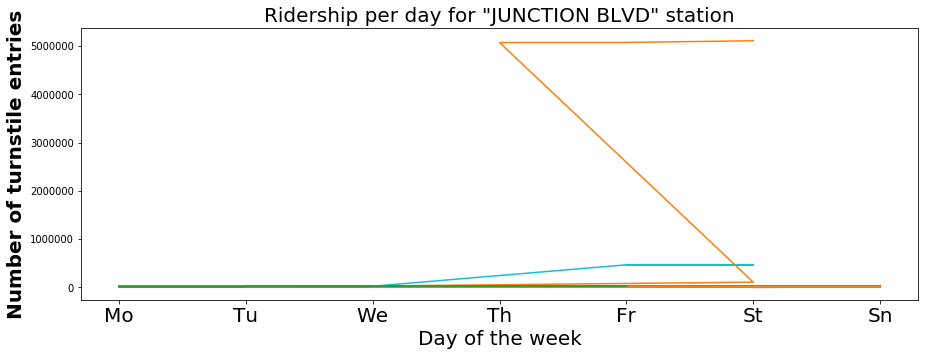

In [88]:
plt.figure(figsize=(15,5))
for i, group in JUNCTION_BLVD.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_TRAFFIC'])
    
plt.xlabel('Day of the week',size=20)
plt.ylabel('Number of turnstile entries',weight="bold",size=20)
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'],size=20)
plt.title('Ridership per day for "JUNCTION BLVD" station',size=20)

Text(0.5, 1.0, 'Ridership per day for "JUNCTION BLVD" station')

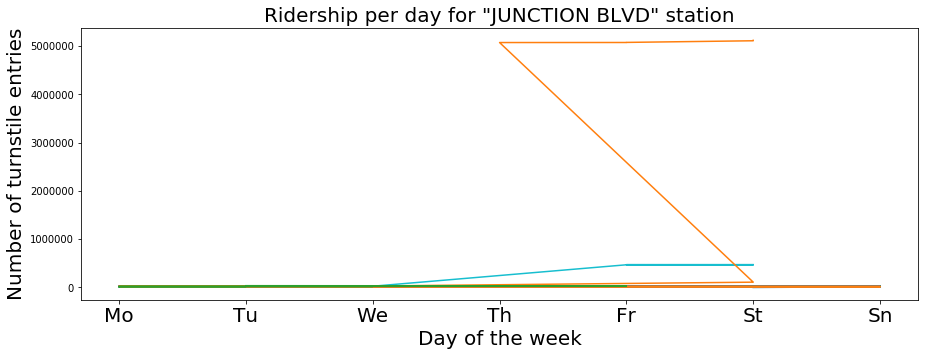

In [87]:
plt.figure(figsize=(15,5))
for i, group in JUNCTION_BLVD.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_TRAFFIC'])
    
plt.xlabel('Day of the week',size=20)
plt.ylabel('Number of turnstile entries',size=20)
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'],size=20)
plt.title('Ridership per day for "JUNCTION BLVD" station',size=20)

Text(0.5, 1.0, 'Ridership per day for 34 ST-PENN STA station')

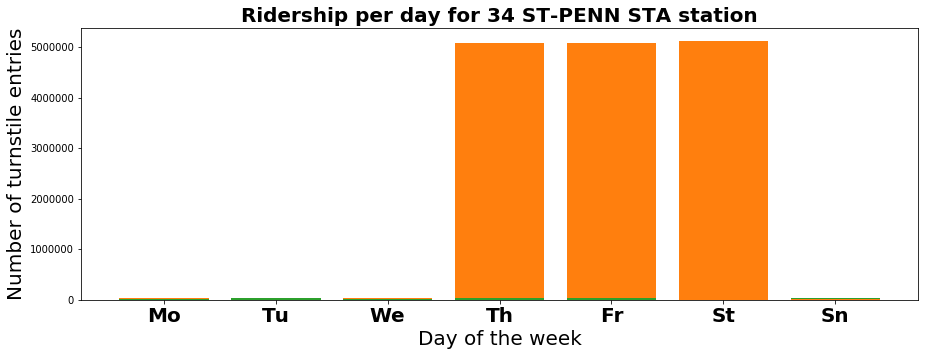

In [86]:
plt.figure(figsize=(15,5))
for i, group in JUNCTION_BLVD.groupby('WEEK_OF_YEAR'):
    plt.bar(group['DAY_OF_WEEK_NUM'], group['DAILY_TRAFFIC'])
    
plt.xlabel('Day of the week',size=20)
plt.ylabel('Number of turnstile entries',size=20)
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'],weight="bold",size=20)
plt.title('Ridership per day for "JUNCTION BLVD" station',weight="bold",size=20)